In [20]:
from google.colab import files
uploaded = files.upload()

Saving Covid_19_data_TM_JE.csv to Covid_19_data_TM_JE (1).csv


In [21]:
import pandas as pd
data = pd.read_csv('Covid_19_data_TM_JE.csv', delimiter=',')
data.head()

,positive,negative,on_ventilator_cumulative,recovered,x2020_pop,tests_per_pop,deaths
0,185,6099,0,0,734002,0.008561,6
1,1796,11282,0,0,4908621,0.002664,45
2,830,10412,39,97,3038999,0.003699,16
3,2269,25141,0,0,7378494,0.003715,64
4,13438,103095,0,0,39937489,0.002918,319


In [22]:
import numpy as np
dataset = np.genfromtxt('Covid_19_data_TM_JE.csv', delimiter=",", skip_header = True)
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format}) 
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(1604, 7)

[[ 185.0  6099.0  0.0  0.0  734002.0  0.0  6.0]
 [ 1796.0  11282.0  0.0  0.0  4908621.0  0.0  45.0]
 [ 830.0  10412.0  39.0  97.0  3038999.0  0.0  16.0]
 [ 2269.0  25141.0  0.0  0.0  7378494.0  0.0  64.0]
 [ 13438.0  103095.0  0.0  0.0  39937489.0  0.0  319.0]]


In [23]:
# base
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

481
1604


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 1000, verbose = 1)

Epoch 1/1000
36/36 [==============================] - 0s 4ms/step - loss: 5.1359 - mae: 5.2573 - val_loss: 90.4532 - val_mae: 96.2689
Epoch 2/1000
36/36 [==============================] - 0s 3ms/step - loss: 5.0406 - mae: 5.1689 - val_loss: 89.1748 - val_mae: 94.9144
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 4.9837 - mae: 5.1118 - val_loss: 88.3878 - val_mae: 94.0599
Epoch 4/1000
36/36 [==============================] - 0s 2ms/step - loss: 4.9370 - mae: 5.0645 - val_loss: 87.5324 - val_mae: 93.1288
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 8.0286 - mae: 5.0143 - val_loss: 86.7472 - val_mae: 92.2732
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 4.9255 - mae: 4.9714 - val_loss: 86.2444 - val_mae: 91.7211
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 4.9254 - mae: 4.9232 - val_loss: 85.4692 - val_mae: 90.8745
Epoch 8/1000
36/36 [==============================] - 0s 2ms/s

{'verbose': 1, 'epochs': 1000, 'steps': 36}


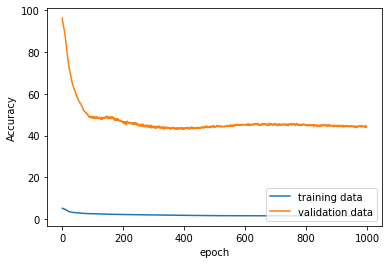

In [31]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['mae']) # replace with accuracy/MAE
plt.plot(thing.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [46]:
# base
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = "model", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=400, verbose=1)

481
1604


In [50]:
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=10, batch_size=1, callbacks = [callback_a, callback_b])

Epoch 1/10
1103/1123 [============================>.] - ETA: 0s - loss: 1.6470 - mae: 1.6470
Epoch 00001: val_loss did not improve from 41.82034
1123/1123 [==============================] - 2s 2ms/step - loss: 1.6656 - mae: 1.6656 - val_loss: 43.1366 - val_mae: 43.1366
Epoch 2/10
1114/1123 [============================>.] - ETA: 0s - loss: 1.6942 - mae: 1.6942
Epoch 00002: val_loss did not improve from 41.82034
1123/1123 [==============================] - 2s 2ms/step - loss: 1.6927 - mae: 1.6927 - val_loss: 43.2088 - val_mae: 43.2088
Epoch 3/10
1107/1123 [============================>.] - ETA: 0s - loss: 1.6762 - mae: 1.6762
Epoch 00003: val_loss did not improve from 41.82034
1123/1123 [==============================] - 2s 2ms/step - loss: 1.6747 - mae: 1.6747 - val_loss: 43.0031 - val_mae: 43.0031
Epoch 4/10
1101/1123 [============================>.] - ETA: 0s - loss: 1.6741 - mae: 1.6741
Epoch 00004: val_loss did not improve from 41.82034
1123/1123 [==============================] - 

{'verbose': 1, 'epochs': 10, 'steps': 1123}


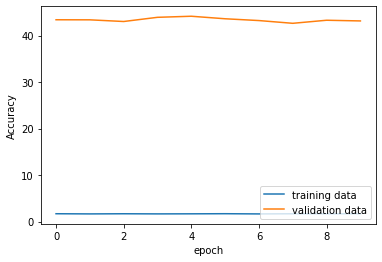

In [48]:
import matplotlib.pyplot as plt
# Check what's in the history
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
model.load_weights("model")
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [0]:
# shows that val loss did not improve beyond ~42

In [0]:
# a) At 1000 epochs the normal method takes about 1 minute, with early stopping it takes about 3 seconds
# b) Without model checkpointing the mae was an average of 1.61 while with model checkpointing it's
# average was about 1.69 so actually slightly higher with.